In [1]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("countypres_2000-2020.csv")

display(df.head(5))
display(df.tail(5))

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,AL GORE,DEMOCRAT,4942,17208,20220315,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993,17208,20220315,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,RALPH NADER,GREEN,160,17208,20220315,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,US PRESIDENT,OTHER,OTHER,113,17208,20220315,TOTAL
4,2000,ALABAMA,AL,BALDWIN,1003.0,US PRESIDENT,AL GORE,DEMOCRAT,13997,56480,20220315,TOTAL


,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
72612,2020,WYOMING,WY,WASHAKIE,56043.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3245,4032,20220315,TOTAL
72613,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JOSEPH R BIDEN JR,DEMOCRAT,360,3560,20220315,TOTAL
72614,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,JO JORGENSEN,LIBERTARIAN,46,3560,20220315,TOTAL
72615,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,OTHER,OTHER,47,3560,20220315,TOTAL
72616,2020,WYOMING,WY,WESTON,56045.0,US PRESIDENT,DONALD J TRUMP,REPUBLICAN,3107,3560,20220315,TOTAL


In [3]:
state_df = df.groupby(["state", "party", "year", "mode"], as_index=False).agg(
    {
        "state_po": "first",
        "candidate": "first", 
        "party": "first", 
        "candidatevotes": "sum", 
        "totalvotes": "sum",
    }
)

display(state_df)

,state,year,mode,state_po,candidate,party,candidatevotes,totalvotes
0,ALABAMA,2000,TOTAL,AL,AL GORE,DEMOCRAT,695602,1672551
1,ALABAMA,2004,TOTAL,AL,JOHN KERRY,DEMOCRAT,693933,1883415
2,ALABAMA,2008,TOTAL,AL,BARACK OBAMA,DEMOCRAT,813479,2099819
3,ALABAMA,2012,TOTAL,AL,BARACK OBAMA,DEMOCRAT,795696,2070353
4,ALABAMA,2016,TOTAL,AL,HILLARY CLINTON,DEMOCRAT,729547,2123367
...,...,...,...,...,...,...,...,...
1166,WYOMING,2004,TOTAL,WY,GEORGE W. BUSH,REPUBLICAN,167629,243428
1167,WYOMING,2008,TOTAL,WY,JOHN MCCAIN,REPUBLICAN,164958,256035
1168,WYOMING,2012,TOTAL,WY,MITT ROMNEY,REPUBLICAN,170962,249061
1169,WYOMING,2016,TOTAL,WY,DONALD TRUMP,REPUBLICAN,174419,255849


## National:

In [4]:
election_result_df = state_df.groupby(["year", "party", "mode"], as_index=False).agg(
    {
        "state": "count",
        "candidatevotes": "sum", 
        "totalvotes": "max",
    }
)

display(election_result_df)

,year,party,mode,state,candidatevotes,totalvotes
0,2000,DEMOCRAT,TOTAL,51,51001968,10965856
1,2000,GREEN,TOTAL,51,2882954,10965856
2,2000,OTHER,TOTAL,51,1068557,10965856
3,2000,REPUBLICAN,TOTAL,51,50457896,10965856
4,2004,DEMOCRAT,TOTAL,51,58899063,12383678
...,...,...,...,...,...,...
87,2020,REPUBLICAN,MAIL,1,198951,1495354
88,2020,REPUBLICAN,ONE STOP,1,1890765,5524802
89,2020,REPUBLICAN,PROV,1,3822,4998482
90,2020,REPUBLICAN,PROVISIONAL,6,62562,5524802


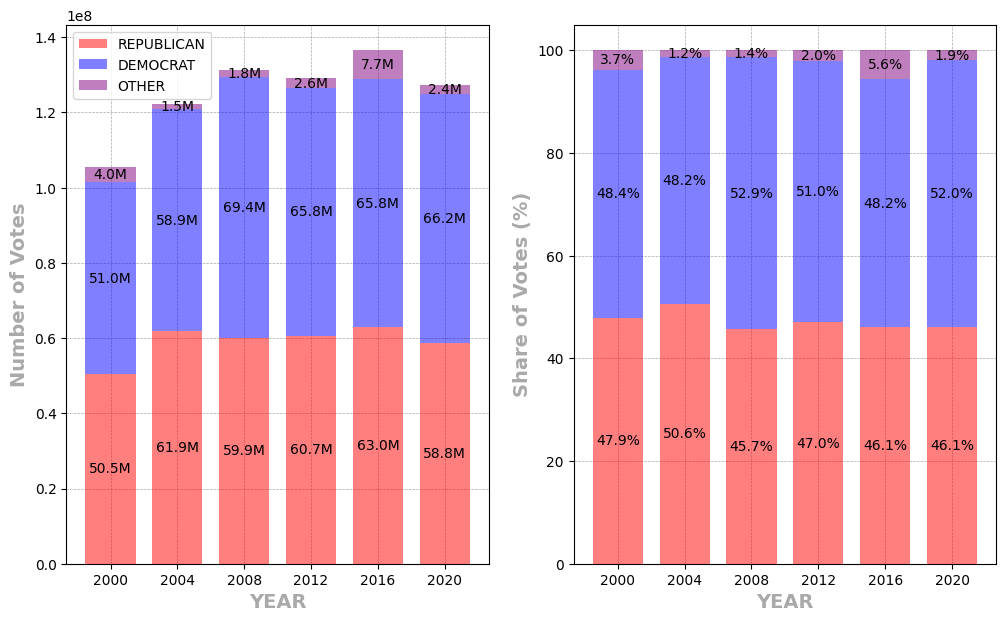

In [5]:
election_result_df_total = election_result_df[election_result_df["mode"] == "TOTAL"]
r = election_result_df_total[election_result_df_total["party"] == "REPUBLICAN"]
d = election_result_df_total[election_result_df_total["party"] == "DEMOCRAT"]
o = election_result_df_total[
    (election_result_df_total["party"] != "DEMOCRAT") & (election_result_df_total["party"] != "REPUBLICAN")
].groupby("year", as_index=False).agg(
    {
        "totalvotes": "first",
        "candidatevotes": "sum",
        "totalvotes": "first",
    }
)

# Plot
fig = plt.figure(figsize=(12., 7.0))

ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel("YEAR", color="darkgrey", fontsize=14, fontweight="bold")
ax.set_ylabel("Number of Votes", color="darkgrey", fontsize=14, fontweight="bold")
ax.set_xticks(r["year"].values)
# ax.set_xticklabels([])
# ax.plot(r["year"], r["candidatevotes"], color="red", ls="-.", lw=0.5, marker="o", alpha=0.75, label="REPUBLICAN")
# ax.plot(d["year"], d["candidatevotes"], color="blue", ls="-.", lw=0.5, marker="o", alpha=0.75, label="DEMOCRAT")
# ax.plot(o["year"], o["candidatevotes"], color="purple", ls="-.", lw=0.5, marker="o", alpha=0.75, label="OTHER")
align = "center"
width = 3
#
height = r["candidatevotes"].values
bottom = np.zeros_like(height)
ax.bar(x=r["year"], height=height, bottom=bottom, align=align, width=width, facecolor="red", alpha=0.5, label="REPUBLICAN")
for x, b, h in zip(o["year"].values, bottom, height):
    ax.text(x, b + 0.5 * h, str(round(float(h) * 1.e-6, 1)) + "M", va="center", ha="center", fontsize=10, color="black")
#
bottom += r["candidatevotes"].values
height = d["candidatevotes"].values
ax.bar(x=d["year"], height=height, bottom=bottom, align=align, width=width, facecolor="blue", alpha=0.5, label="DEMOCRAT")
for x, b, h in zip(o["year"].values, bottom, height):
    ax.text(x, b + 0.5 * h, str(round(float(h) * 1.e-6, 1)) + "M", va="center", ha="center", fontsize=10, color="black")
#
bottom += d["candidatevotes"].values
height = o["candidatevotes"].values
ax.bar(x=o["year"], height=height, bottom=bottom, align=align, width=width, facecolor="purple", alpha=0.5, label="OTHER")
for x, b, h in zip(o["year"].values, bottom, height):
    ax.text(x, b + 0.5 * h, str(round(float(h) * 1.e-6, 1)) + "M", va="center", ha="center", fontsize=10, color="black")
ax.grid(ls="--", lw=0.5, color="darkgray")
ax.legend(loc="upper left")
ax.set_axisbelow(True)


ax = fig.add_subplot(1, 2, 2) #, sharex=ax)
# ax = ax.twinx()
ax.set_xlabel("YEAR", color="darkgrey", fontsize=14, fontweight="bold")
ax.set_ylabel("Share of Votes (%)", color="darkgrey", fontsize=14, fontweight="bold")
ax.set_xticks(r["year"].values)
# ax.set_xticklabels([])
# ax.plot(r["year"], r["candidatevotes"] / r["totalvotes"], color="red", ls="--", lw=0.5, alpha=0.5, marker="d")
# ax.plot(d["year"], d["candidatevotes"] / d["totalvotes"], color="blue", ls="--", lw=0.5, alpha=0.5, marker="d")
# ax.plot(o["year"], o["candidatevotes"] / o["totalvotes"], color="purple", ls="--", lw=0.5, alpha=0.5, marker="d")
align = "center"
width = 3
total_votes = r["candidatevotes"].values + d["candidatevotes"].values + o["candidatevotes"].values
#
height = 100 * (r["candidatevotes"].values / total_votes)
bottom = np.zeros_like(height)
ax.bar(x=r["year"], height=height, bottom=bottom, align=align, width=width, facecolor="red", alpha=0.5, label="REPUBLICAN")
for x, b, h in zip(r["year"].values, bottom, height):
    ax.text(x, b + 0.5 * h, str(round(float(h), 1)) + "%", va="center", ha="center", fontsize=10, color="black")
#
bottom += height 
height = 100 * (d["candidatevotes"].values / total_votes)
ax.bar(x=d["year"], height=height, bottom=bottom, align=align, width=width, facecolor="blue", alpha=0.5, label="DEMOCRAT")
for x, b, h in zip(d["year"].values, bottom, height):
    ax.text(x, b + 0.5 * h, str(round(float(h), 1)) + "%", va="center", ha="center", fontsize=10, color="black")
#
bottom += height 
height = 100 * (o["candidatevotes"].values / total_votes)
ax.bar(x=o["year"], height=height, bottom=bottom, align=align, width=width, facecolor="purple", alpha=0.5, label="OTHER")
for x, b, h in zip(o["year"].values, bottom, height):
    ax.text(x, b + 0.5 * h, str(round(float(h), 1)) + "%", va="center", ha="center", fontsize=10, color="black")
#
ax.grid(ls="--", lw=0.5, color="darkgray")
ax.set_axisbelow(True)

plt.show()

## Key States:

In [6]:
swing_states = ["WI", "MI", "PA", "NC", "GA", "AZ", "NV", "FL", "TX"]

swing_states_df = df[df["state_po"].isin(swing_states)].groupby(["state", "party", "year", "mode"], as_index=False).agg(
    {
        "state_po": "first",
        "candidate": "first", 
        "party": "first", 
        "candidatevotes": "sum", 
        "totalvotes": "sum",
    }
)

display(swing_states_df)

,state,year,mode,state_po,candidate,party,candidatevotes,totalvotes
0,ARIZONA,2000,TOTAL,AZ,AL GORE,DEMOCRAT,685341,1534113
1,ARIZONA,2004,TOTAL,AZ,JOHN KERRY,DEMOCRAT,893524,2012585
2,ARIZONA,2008,TOTAL,AZ,BARACK OBAMA,DEMOCRAT,1034707,2293475
3,ARIZONA,2012,TOTAL,AZ,BARACK OBAMA,DEMOCRAT,1025232,2299254
4,ARIZONA,2016,TOTAL,AZ,HILLARY CLINTON,DEMOCRAT,1161167,2604277
...,...,...,...,...,...,...,...,...
213,WISCONSIN,2004,TOTAL,WI,GEORGE W. BUSH,REPUBLICAN,1478120,2997007
214,WISCONSIN,2008,TOTAL,WI,JOHN MCCAIN,REPUBLICAN,1262393,2983417
215,WISCONSIN,2012,TOTAL,WI,MITT ROMNEY,REPUBLICAN,1410966,3071434
216,WISCONSIN,2016,TOTAL,WI,DONALD TRUMP,REPUBLICAN,1404440,2975753


In [7]:
def plot_state_resaults(
    state_results_df, 
    ax, 
    title=None,
    relative=False,
    show_legend=True,
    show_xlabel=True,
    show_ylabel=True,
    show_xticklabels=True,
):
    """Utility function to plot state results.
    """
    r = state_results_df[state_results_df["party"] == "REPUBLICAN"]
    d = state_results_df[state_results_df["party"] == "DEMOCRAT"]
    o = state_results_df[
        (state_results_df["party"] != "DEMOCRAT") & (state_results_df["party"] != "REPUBLICAN")
    ].groupby("year", as_index=False).agg(
        {
            "candidatevotes": "sum",
            "totalvotes": "first",
        }
    )

    # Total number of casted votes (only used when `relative` is True)
    total_votes = r["candidatevotes"].values + d["candidatevotes"].values + o["candidatevotes"].values

    if title is not None and title != "":
        ax.set_title(title, fontsize=12, fontweight="bold")
    if show_xlabel:
        ax.set_xlabel("YEAR", color="darkgrey", fontsize=12, fontweight="bold")
    if show_ylabel:
        ax.set_ylabel("Number of Votes", color="darkgrey", fontsize=12, fontweight="bold")
    ax.set_xticks(r["year"].values)
    if not show_xticklabels:
        ax.set_xticklabels([])
    align = "center"
    width = 3
    text_fontzie = 8
    #
    if relative:
        height = 100 * (r["candidatevotes"].values / total_votes)
    else:
        height = r["candidatevotes"].values
    bottom = np.zeros_like(height)
    ax.bar(x=r["year"], height=height, bottom=bottom, align=align, width=width, facecolor="red", alpha=0.5, label="REPUBLICAN")
    for x, b, h in zip(o["year"].values, bottom, height):
        if relative:
            s = f"{str(round(float(h), 1))}%"
        else:
            s = f"{str(round(float(h) * 1.e-6, 1))}M"
        ax.text(x, b + 0.5 * h, s, va="center", ha="center", fontsize=10, color="black")
    #
    bottom += height
    if relative:
        height = 100 * (d["candidatevotes"].values / total_votes)
    else:
        height = d["candidatevotes"].values
    ax.bar(x=d["year"], height=height, bottom=bottom, align=align, width=width, facecolor="blue", alpha=0.5, label="DEMOCRAT")
    for x, b, h in zip(o["year"].values, bottom, height):
        if relative:
            s = f"{str(round(float(h), 1))}%"
        else:
            s = f"{str(round(float(h) * 1.e-6, 1))}M"
        ax.text(x, b + 0.5 * h, s, va="center", ha="center", fontsize=10, color="black")
    #
    bottom += height
    if relative:
        height = 100 * (o["candidatevotes"].values / total_votes)
    else:
        height = o["candidatevotes"].values
    ax.bar(x=o["year"], height=height, bottom=bottom, align=align, width=width, facecolor="purple", alpha=0.5, label="OTHER")
    for x, b, h in zip(o["year"].values, bottom, height):
        if relative:
            s = f"{str(round(float(h), 1))}%"
        else:
            s = f"{str(round(float(h) * 1.e-6, 1))}M"
        ax.text(x, b + 0.5 * h, s, va="center", ha="center", fontsize=10, color="black")
    ax.grid(ls="--", lw=0.5, color="darkgray")
    if show_legend:
        ax.legend(loc="upper left", fontsize=8.0)
    ax.set_axisbelow(True)


### Count:

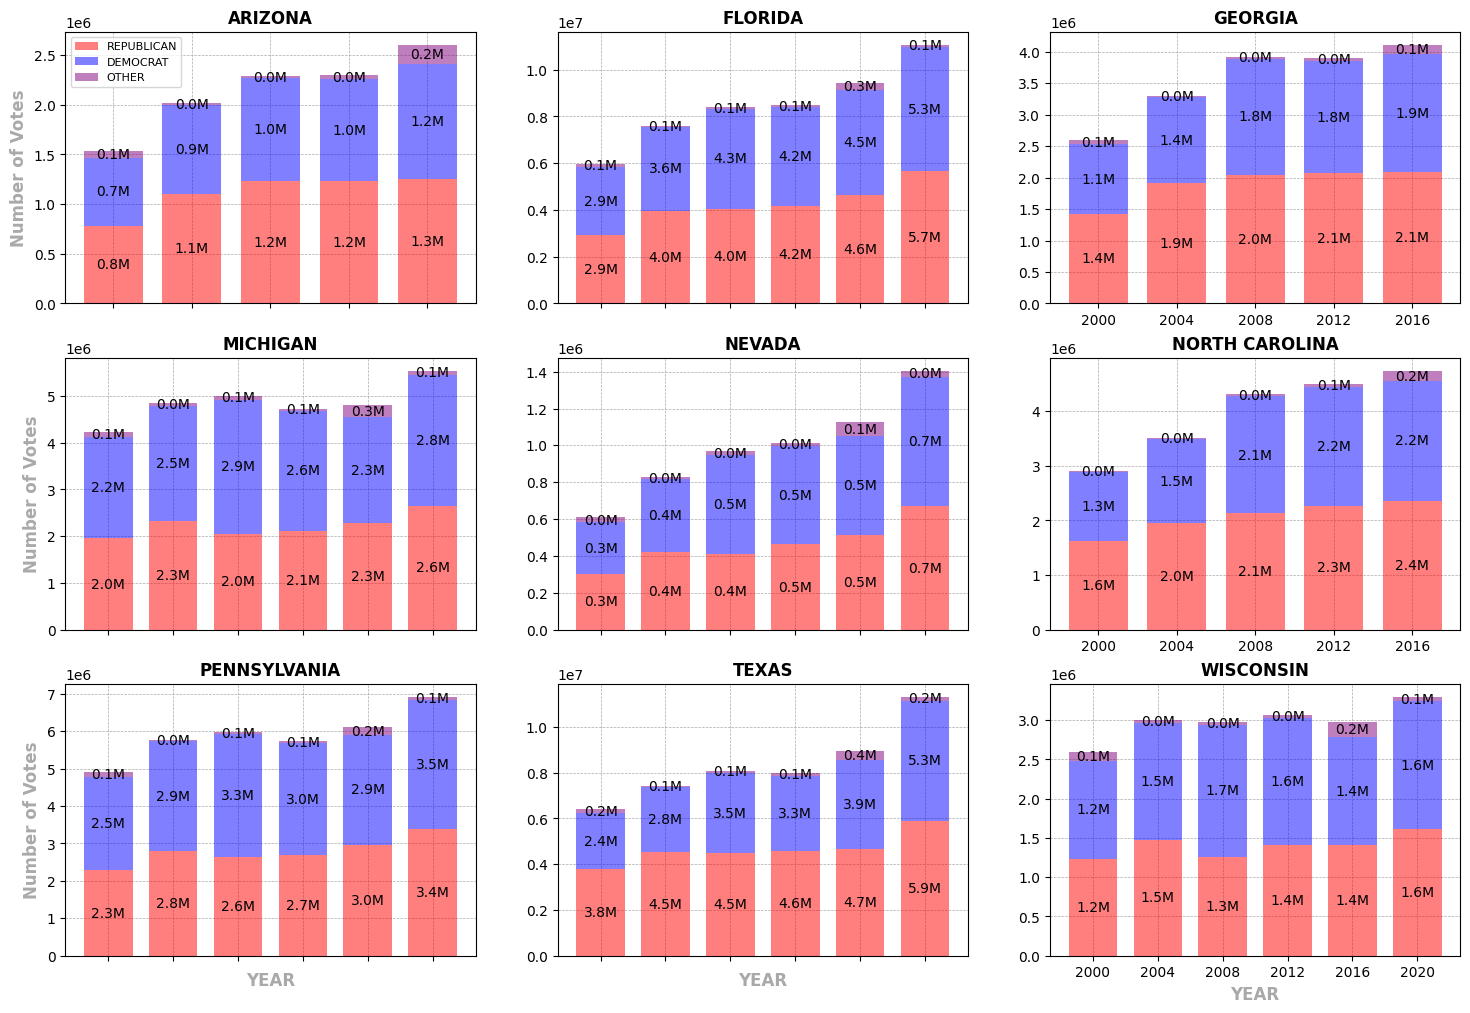

In [8]:
relative = False
n_cols = 3
n_rows = math.ceil(len(swing_states) / n_cols)
figsize = (18., 12.0)

# Plot:
fig = plt.figure(figsize=figsize)
for n, item in enumerate(swing_states_df.groupby(["state", "state_po"]), start=1):
    name, group = item
    # print(f"State Name: {name[0]:<16}")
    # print(f"n= {n}, first col.: {(n % n_cols == 1)}, last row: {(math.ceil(n / n_cols) == n_rows)}")
    ax = fig.add_subplot(n_rows, n_cols, n)
    plot_state_resaults(
        group[group["mode"] == "TOTAL"], 
        ax, 
        title=name[0],
        relative=relative,
        show_legend=(n == 1),
        show_xlabel=(math.ceil(n / n_cols) == n_rows),
        show_ylabel=(n % n_cols == 1),
        show_xticklabels=(n % n_rows == 0)
    )

### Relative:

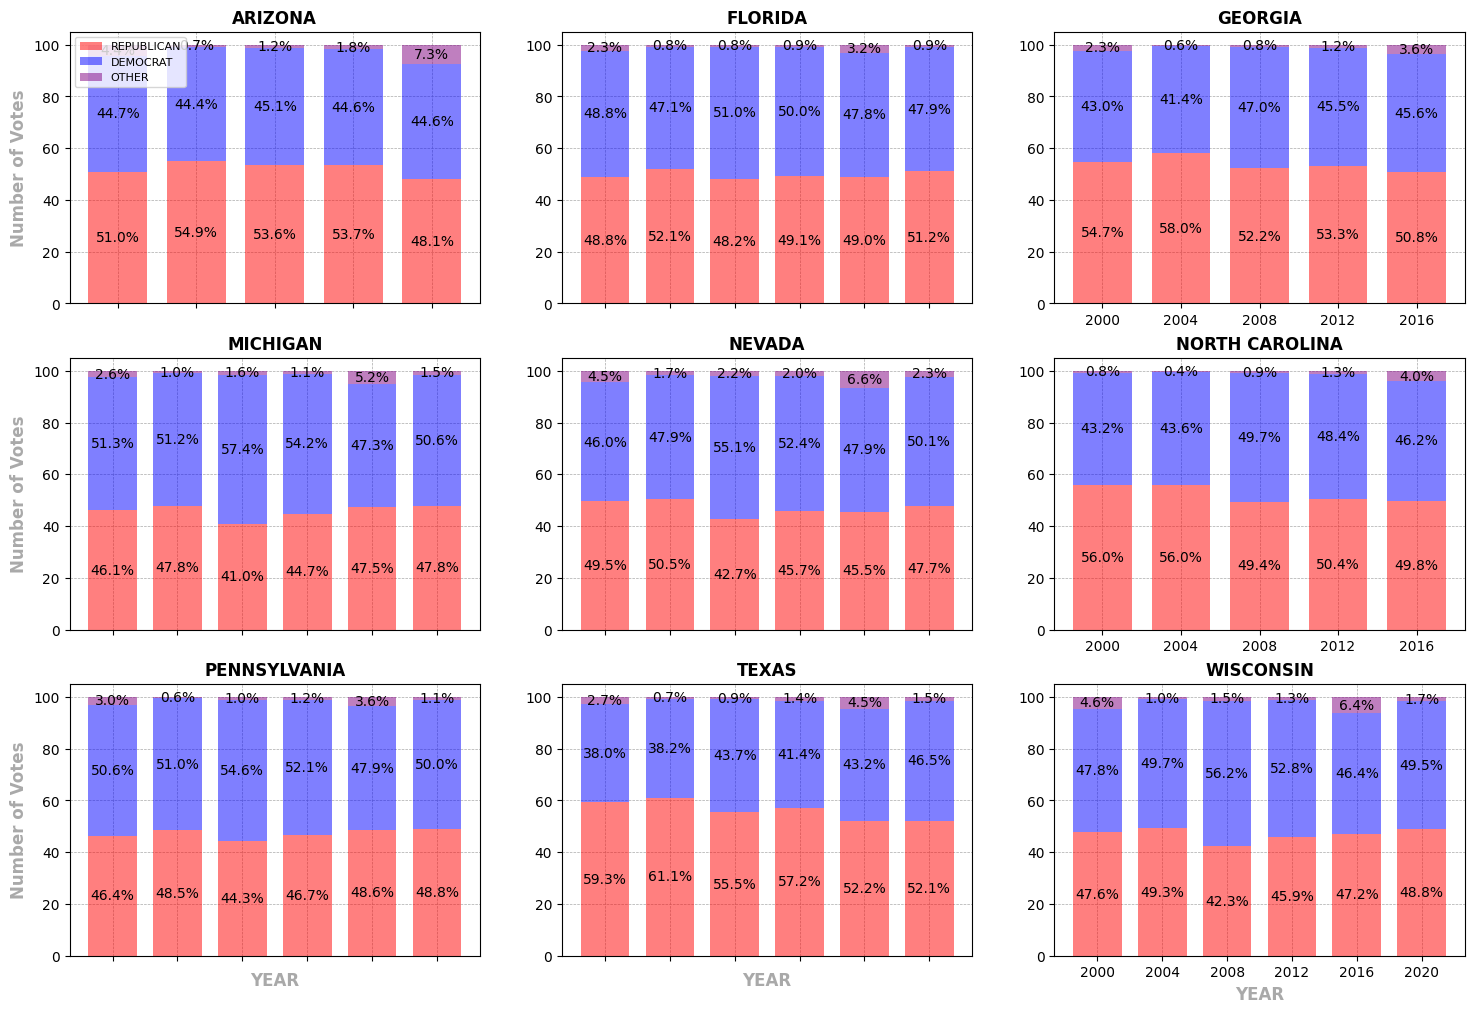

In [9]:
relative = True
n_cols = 3
n_rows = math.ceil(len(swing_states) / n_cols)
figsize = (18., 12.0)

# Plot:
fig = plt.figure(figsize=figsize)
for n, item in enumerate(swing_states_df.groupby(["state", "state_po"]), start=1):
    name, group = item
    # print(f"State Name: {name[0]:<16}")
    # print(f"n= {n}, first col.: {(n % n_cols == 1)}, last row: {(math.ceil(n / n_cols) == n_rows)}")
    ax = fig.add_subplot(n_rows, n_cols, n)
    plot_state_resaults(
        group[group["mode"] == "TOTAL"], 
        ax, 
        title=name[0],
        relative=relative,
        show_legend=(n == 1),
        show_xlabel=(math.ceil(n / n_cols) == n_rows),
        show_ylabel=(n % n_cols == 1),
        show_xticklabels=(n % n_rows == 0)
    )